# **Simple Linear Regression**

**Importing Needed packages**

In [51]:
#Importing the libraries
import pandas as pd
import numpy as np

In [52]:
# Installing seaborn (this step may not be necessary if seaborn is already installed)
import piplite 
await piplite.install("Seaborn")

# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying plots inline in Jupyter/Colab notebooks
%matplotlib inline

**Linear Regression**:

Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. In linear regression, the relationship between the variables is modeled using a linear equation. This equation can be used to predict the value of the dependent variable based on the values of the independent variables.

There are several types of linear regression, including simple linear regression, multiple linear regression, and polynomial regression.

 - **Simple linear regression**: This type of linear regression models the relationship between a dependent variable and a single independent variable. It is used to identify the strength of the relationship between the two variables and to predict the value of the dependent variable based on the value of the independent variable.

  - **Multiple linear regression**: This type of linear regression models the relationship between a dependent variable and two or more independent variables. It is used to identify the strength of the relationship between the variables and to predict the value of the dependent variable based on the values of the independent variables.

 - **Polynomial regression**: This type of linear regression is used to model relationships between the dependent and independent variables that are not linear. It can be used to fit a curve to the data and make predictions based on the curve.

# Simple Linear Regression

**Simple Linear Regression** is a statistical method to model the relationship between two variables: one independent variable (X) and one dependent variable (Y). It assumes a linear relationship between them, represented by the equation:

\[
Y = \beta_0 + \beta_1 X + \epsilon
\]

Where:
- **Y** = Dependent variable (target)
- **X** = Independent variable (predictor)
- **β₀** = Intercept (Y when X = 0)
- **β₁** = Slope (change in Y for a one-unit change in X)
- **ε** = Error term (random variation)

**Assumptions  of Regression Model :**

- **Linearity**: X and Y have a linear relationship.
 
- **Independence**: Data points are independent.
 
- **Homoscedasticity**: Constant variance of errors across all values of X.
 
- **Normality of Errors**: Errors are normally distributed.
  

**Downloading Data**

To download the data, we can use pd.read_csv()

In [53]:
# Reading the Dataset
df = pd.read_csv("FuelConsumptionCo2.csv")

In [54]:
# The following command displays the first 5 rows of the DataFrame 'df'
# This is useful to get a quick preview of your data and check its structure.

df.head()  # Returns the first 5 rows of the DataFrame by default

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



**Understanding the Data**

We have downloaded a fuel consumption dataset, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/fuel-consumption-guide/understanding-fuel-consumption-ratings/fuel-consumption-testing/21008) 

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE** CLASS e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS**  e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0



**Data Exploration**

Let's first have a descriptive exploration on our data.


In [55]:
# The following command generates descriptive statistics for all the numerical columns in the DataFrame 'df'
# It helps you quickly summarize the distribution and central tendency of the data.

df.describe()  # Returns summary statistics for numerical columns in the DataFrame

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [56]:
# The following command returns the number of rows and columns in the DataFrame 'df'.
# It is useful to quickly check the size of your dataset.

df.shape  # Returns a tuple (number_of_rows, number_of_columns)

(1067, 13)

In [57]:
# The following command provides a summary of the DataFrame 'df'.
# It includes the column names, data types, and the number of non-null entries for each column.

df.info()  # Returns a summary of the DataFrame, including column data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 87.6+ KB


In [58]:
# The following command displays the first 5 rows of the DataFrame 'df'
# This is useful to get a quick preview of your data and check its structure.

df.head()  # Returns the first 5 rows of the DataFrame by default

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [59]:
# The following command displays the last 5 rows of the DataFrame 'df'
# It is useful for checking the end of your dataset and making sure the data is properly loaded.

df.tail()  # Returns the last 5 rows of the DataFrame by default

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


Let's select some features to explore more.

In [60]:
# Subsetting specific columns from the DataFrame
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
# Displaying the first 10 rows of the selected columns
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


We can plot each of these features:

<Figure size 1500x500 with 0 Axes>

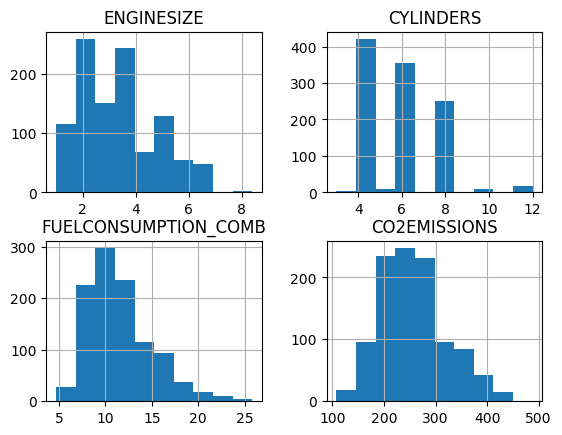

In [61]:
# Setting up the figure size
plt.figure(figsize=(15,5))

# Selecting the relevant columns
viz=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# Creating histograms
viz.hist()

# Showing the plot
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:

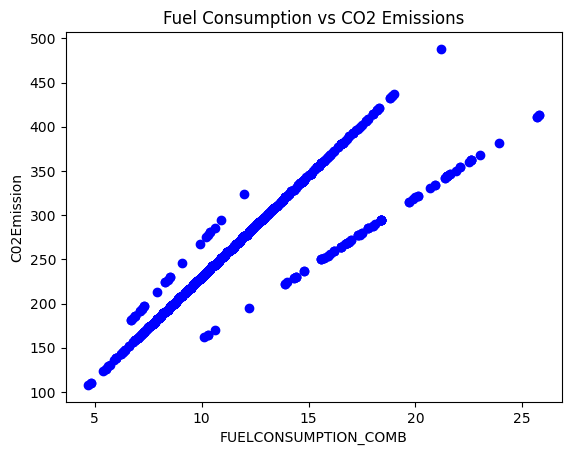

In [62]:
# Scatter plot for Fuel Consumption vs CO2 Emissions
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue') 

# Adding labels to the axes
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("C02Emission")

# Adding a title to the plot
plt.title("Fuel Consumption vs CO2 Emissions")

# Showing the plot
plt.show()

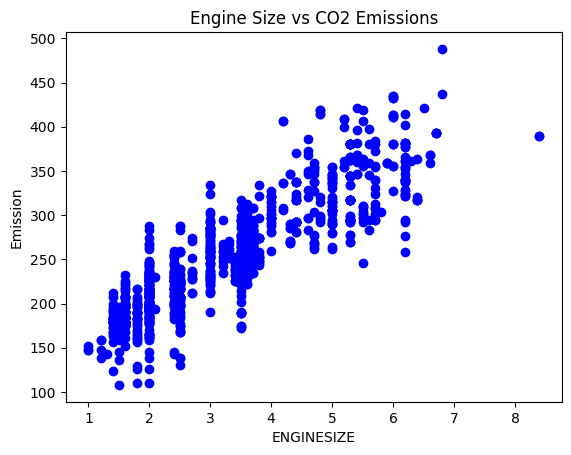

In [63]:
# Scatter plot for Engine Size vs CO2 Emissions
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')

# Adding labels to the axes
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")

# Adding a title to the plot
plt.title("Engine Size vs CO2 Emissions")

# Showing the plot
plt.show()

Plotting CYLINDER vs the Emission, to see how linear is their relationship is:

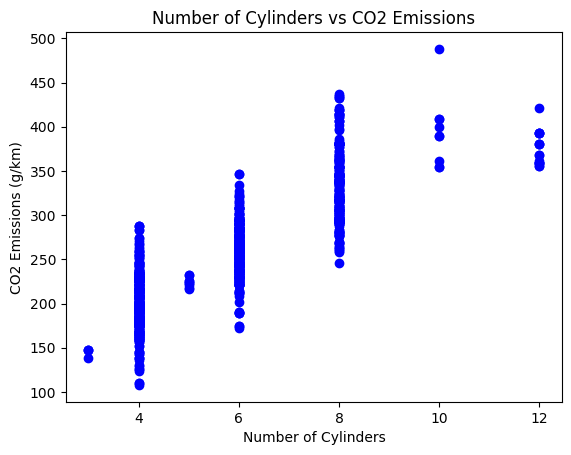

In [64]:
# Scatter plot for Cylinders vs CO2 Emissions
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')

# Adding labels to the axes
plt.xlabel("Number of Cylinders")
plt.ylabel("CO2 Emissions (g/km)")

# Adding a title to the plot
plt.title("Number of Cylinders vs CO2 Emissions")

# Showing the plot
plt.show()


**Creating train and test dataset**

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:


In [65]:
# Creating a random mask with 80% True values and 20% False values
msk = np.random.rand(len(df)) < 0.8

# Splitting the data into training and testing sets
train = cdf[msk]
test = cdf[~msk]

# printing/Output to confirm the split or shapes of the train and test sets to verify
print("Training set shape:", train.shape)
print("Test set shape:", test.shape)

Training set shape: (841, 4)
Test set shape: (226, 4)



**Simple Regression Model**

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


**Train data distribution**

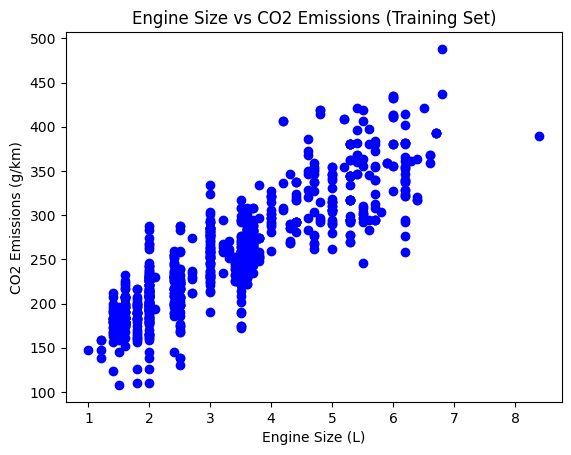

In [66]:
# Scatter plot for Engine Size vs CO2 Emissions in the training set
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

# Adding labels to the axes
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

# Adding a title to the plot
plt.title("Engine Size vs CO2 Emissions (Training Set)")

# Showing the plot
plt.show()

**Modeling**

Using sklearn package to model data.

In [67]:
# Importing the LinearRegression class from sklearn
from sklearn.linear_model import LinearRegression
# Creating an instance of the LinearRegression model
regr= LinearRegression()


# Linear Regression: Engine Size vs CO2 Emissions
print("Linear Regression: Engine Size vs CO2 Emissions")

# Preparing the input (Engine Size) and output (CO2 Emissions) for training
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

# Fitting the model to the training data
regr.fit(train_x, train_y)

# Printing the coefficients and intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Linear Regression: Engine Size vs CO2 Emissions
Coefficients:  [[39.21551092]]
Intercept:  [125.11970107]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.


**Plot outputs**

We can plot the fit line over the data:


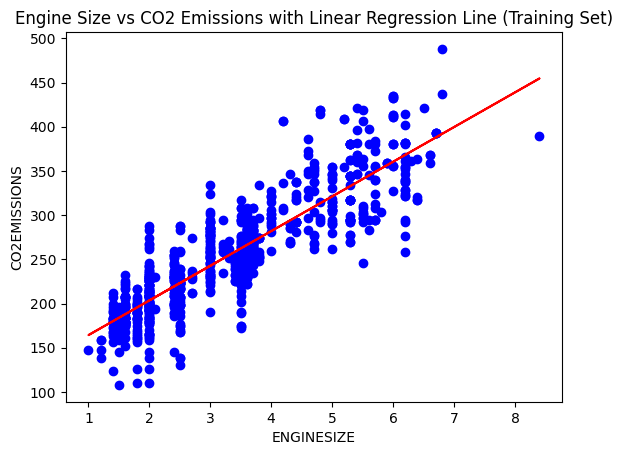

In [68]:
# Scatter plot for Engine Size vs CO2 Emissions with Regression Line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

# Plotting the regression line: y = coef * x + intercept
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], "-r")

# Adding labels to the axes
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

# Adding a title to the plot
plt.title("Engine Size vs CO2 Emissions with Linear Regression Line (Training Set)")

# Showing the plot
plt.show()


**Evaluation**

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

- **Mean Absolute Error:** It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

- **Mean Squared Error (MSE):** Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

- **Root Mean Squared Error (RMSE):** R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).



In [69]:
# Importing R² Score for Model Evaluation
from sklearn.metrics import r2_score

# Model Evaluation: Mean Absolute Error, MSE, and R²-score
print("Model Evaluation: Mean Absolute Error, MSE, and R²-score")

# Preparing the test data
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])

# Predicting the CO2 Emissions using the trained model
test_y_ = regr.predict(test_x)

# Calculate and print evaluation metrics

# Mean Absolute Error (MAE)
# Formula: MAE = (1/n) * Σ|y_i - ŷ_i|
# Measures the average magnitude of errors in predictions.
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y))) 

# Mean Squared Error (MSE)
# Formula: MSE = (1/n) * Σ(y_i - ŷ_i)²
# Measures the average squared difference between actual and predicted values
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))

# Root Mean Squared Error(Coefficient of Determination)
# Formula: R² = 1 - (Σ(y_i - ŷ_i)² / Σ(y_i - ȳ)²)
# Measures the proportion of variance in the target variable explained by the model.
# R² = 1 indicates perfect predictions, while R² = 0 indicates no predictive power.
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Model Evaluation: Mean Absolute Error, MSE, and R²-score
Mean absolute error: 21.57
Residual sum of squares (MSE): 764.48
R2-score: 0.78


**Conclusion :**

In this project, I successfully applied Simple Linear Regression using Python to model the relationship between two variables. After exploring the data, I trained the model using scikit-learn and evaluated its performance with metrics like MSE and R-squared. The results showed how well the model fitted the data, and the regression line was visualized on a scatter plot. This project strengthened my understanding of linear regression and provided hands-on experience in model building and evaluation, laying the foundation for more advanced techniques.